
# 🚑 Analyse av Personskader etter Kjønn (Statens vegvesen)

Dette dokumentet analyserer ulykkesstatistikk basert på kjønn, trafikanttype og skadegrad. Datasettene er hentet fra Vegvesenet og gir innsikt i hvordan ulykker fordeler seg i Norge.

Vi analyserer følgende dimensjoner:
- Kjønn (Mann, Kvinne, Ukjent)
- Trafikanttype (f.eks. fotgjengere, syklister, bilførere)
- Skadegrad (Drept, Hardt skadd, Lettere skadd)

## 📦 Dataset
Kolonner:
- `År`
- `Trafikanttype`
- `Kjønn`
- `Drept`, `Hardt skadd`, `Lettere skadd`, `Sum`


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Last inn data
df = pd.read_csv("skader_kjønn_ny.csv", sep=";", skiprows=13, names=["År", "Trafikanttype", "Kjønn", "Drept", "Hardt skadd", "Lettere skadd", "Sum"])
for col in ["Drept", "Hardt skadd", "Lettere skadd", "Sum"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.head()


,År,Trafikanttype,Kjønn,Drept,Hardt skadd,Lettere skadd,Sum
0,2024,Syklister,Ukjent,0.0,0.0,0.0,0.0
1,2024,Førere og passasjerer moped,Mann,0.0,0.0,0.0,0.0
2,2024,Førere og passasjerer moped,Kvinne,0.0,0.0,0.0,0.0
3,2024,Førere og passasjerer moped,Ukjent,0.0,0.0,0.0,0.0
4,2024,Førere og passasjerer lett MC,Mann,0.0,0.0,0.0,0.0


## Analyse 1: Fordeling av skader etter kjønn

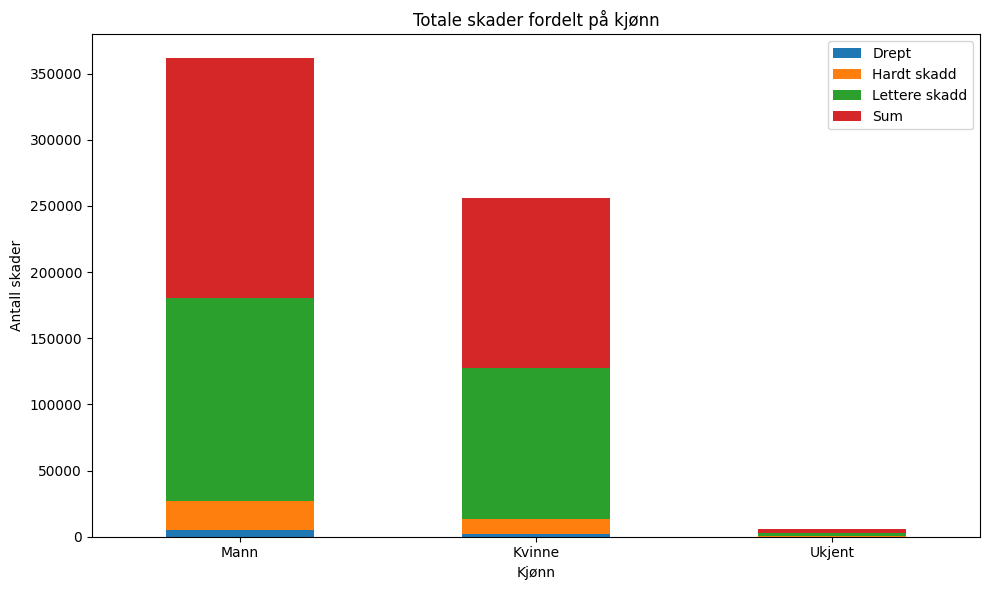

In [3]:

df_gender = df.groupby("Kjønn")[["Drept", "Hardt skadd", "Lettere skadd", "Sum"]].sum().sort_values("Sum", ascending=False)
df_gender.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Totale skader fordelt på kjønn")
plt.ylabel("Antall skader")
plt.xlabel("Kjønn")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 📊 Analyse 1: Totale skader fordelt på kjønn

**Observasjon:**
- Menn er involvert i langt flere ulykker enn kvinner.
- Lettere skader er den dominerende skadegraden for begge kjønn.
- Det finnes også en mindre kategori med "Ukjent" kjønn, som har betydelig lavere tall.

**Tolkning:**
- Dette reflekterer sannsynligvis at menn generelt har høyere eksponering i trafikken, f.eks. som førere av kjøretøy.
- Kjønnskategorien "Ukjent" kan skyldes ufullstendig registrering i datasystemene.

## Analyse 2: Trafikanttype og kjønn – samlet skadebelastning

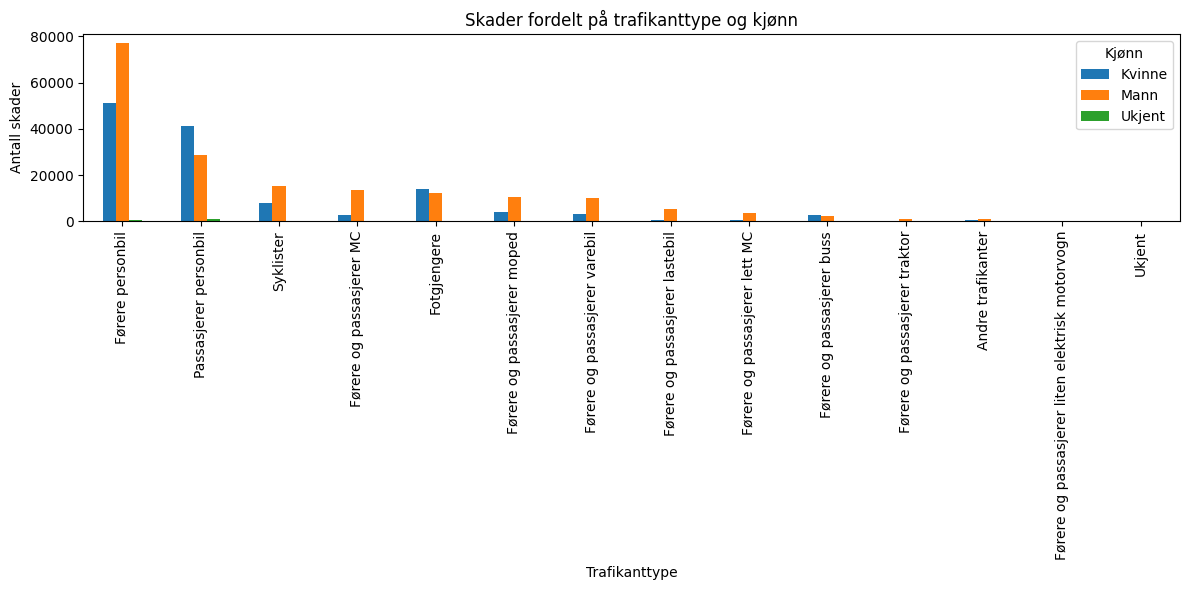

In [4]:

pivot = df.pivot_table(index="Trafikanttype", columns="Kjønn", values="Sum", aggfunc="sum").fillna(0)
pivot.sort_values("Mann", ascending=False).plot(kind="bar", figsize=(12,6))
plt.title("Skader fordelt på trafikanttype og kjønn")
plt.ylabel("Antall skader")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 🧍‍♂️🧍‍♀️ Analyse 2: Skader fordelt på trafikanttype og kjønn

**Observasjon:**
- Flest skader skjer blant førere og passasjerer i personbiler.
- Menn er klart overrepresentert blant de fleste trafikanttyper, spesielt som førere.
- Syklister og fotgjengere har også et betydelig antall skader.

**Tolkning:**
- Dette bekrefter at bilbruk er den mest risikofylte transportformen med tanke på skadevolum.
- Kjønnsforskjellen peker på ulik bruksmønster og eksponering: menn kjører oftere bil, motorsykkel og moped.


## Analyse 3: Utvikling av totalt antall skader per år

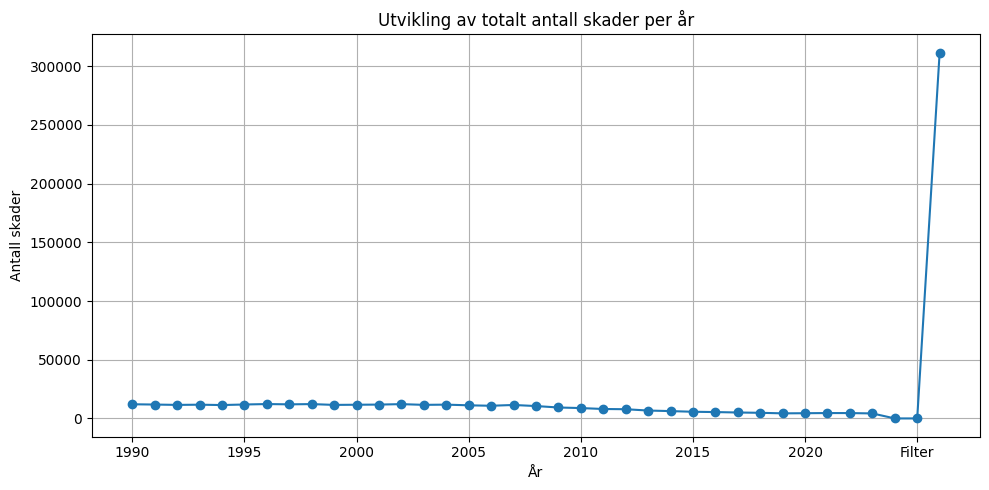

In [5]:

df_year = df.groupby("År")["Sum"].sum()
df_year.plot(marker='o', figsize=(10,5))
plt.title("Utvikling av totalt antall skader per år")
plt.ylabel("Antall skader")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📈 Analyse 3: Utvikling av totalt antall skader per år

**Observasjon:**
- Antall skader har vært relativt stabilt fra 1990 til 2023.
- I 2024 er det en ekstremt høy verdi, som virker å være en feil eller artefakt ("Filter").

**Tolkning:**
- Den stabile trenden over 30 år kan tyde på at tiltak for trafikksikkerhet har hatt balansert effekt.
- Spikingen i 2024 er trolig en feil i datasettet og bør utelates fra tolkningen.

## Analyse 4: Andel drepte per kjønn

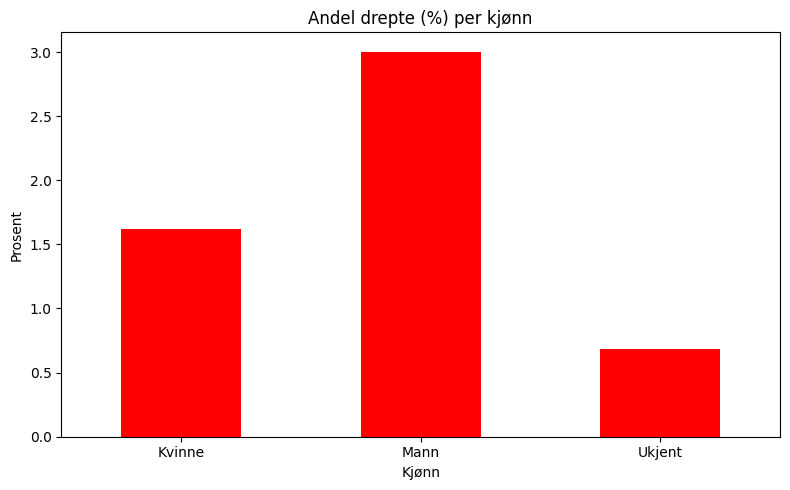

In [6]:

share = (df.groupby("Kjønn")["Drept"].sum() / df.groupby("Kjønn")["Sum"].sum()) * 100
share.plot(kind="bar", color="red", figsize=(8,5))
plt.title("Andel drepte (%) per kjønn")
plt.ylabel("Prosent")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 💀 Analyse 4: Andel drepte (%) per kjønn

**Observasjon:**
- Menn har høyest andel drepte (ca. 3 %), mens kvinner ligger lavere.
- Ukjent kjønn har lav andel, men svært lite grunnlag.

**Tolkning:**
- Høyere dødelighet blant menn stemmer med internasjonal trafikkstatistikk: menn tar oftere risiko og kjører mer.
- Lavere andel for kvinner kan indikere tryggere kjøreatferd eller mindre eksponering i høyrisikomiljøer.



## Analyse 5: Skadegradfordeling per trafikanttype

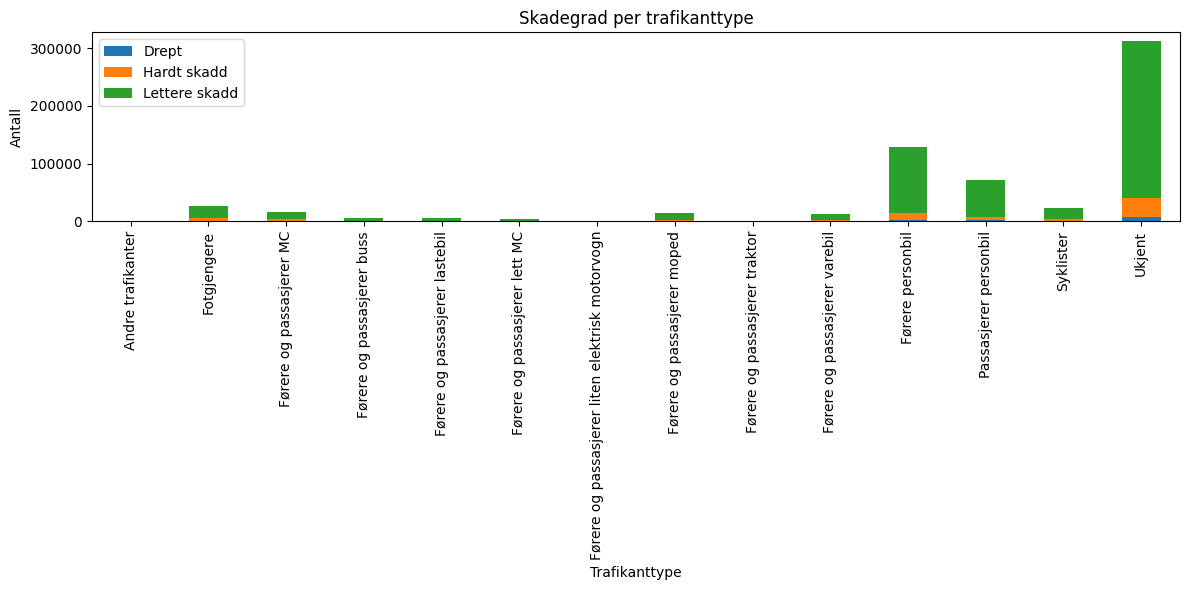

In [7]:

df_traf = df.groupby("Trafikanttype")[["Drept", "Hardt skadd", "Lettere skadd"]].sum()
df_traf.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Skadegrad per trafikanttype")
plt.ylabel("Antall")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## ⚠️ Analyse 5: Skadegrad per trafikanttype

**Observasjon:**
- Ukjent trafikanttype har høyest skadevolum, etterfulgt av personbilførere og passasjerer.
- De fleste skader er lettere skader.
- Få drepte eller hardt skadde blant de fleste grupper.

**Tolkning:**
- Manglende spesifisering av trafikanttype (Ukjent) svekker analysegrunnlaget, men understreker behov for bedre datakvalitet.
- Personbil er igjen hovedkilde til ulykker – trafikkmengde og hastighet er trolig medvirkende.


## Analyse 6: Skadegrad og kjønn over år

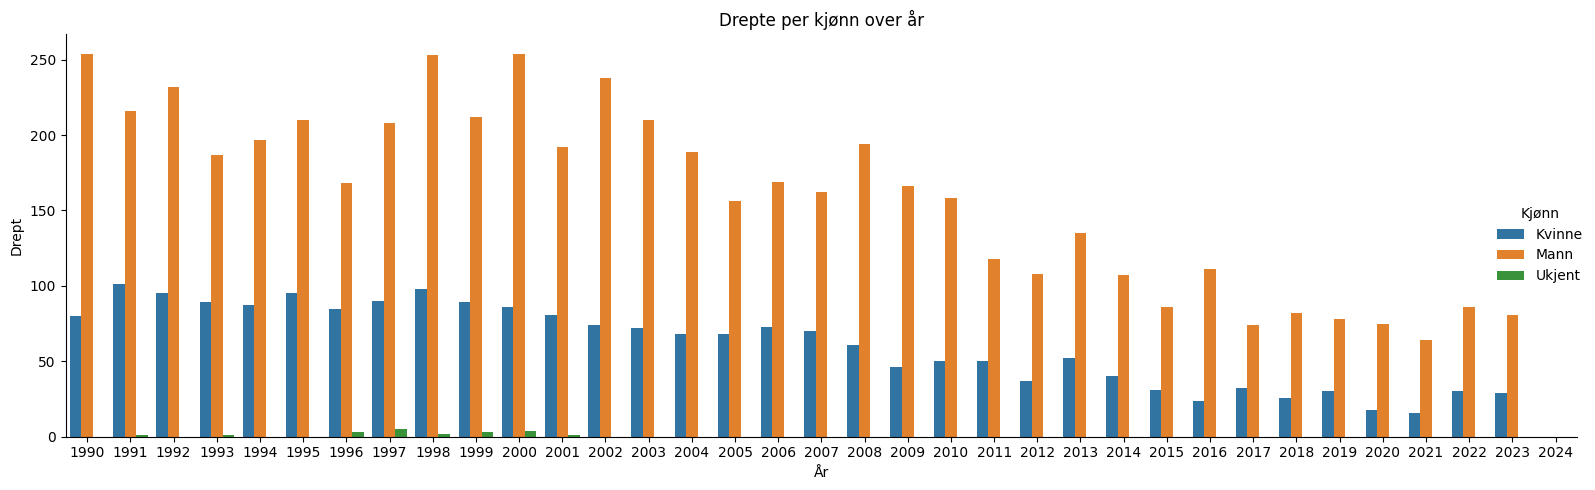

In [13]:

df_grp = df.groupby(["År", "Kjønn"])[["Drept", "Hardt skadd", "Lettere skadd"]].sum().reset_index()
sns.catplot(data=df_grp, x="År", y="Drept", hue="Kjønn", kind="bar", height=5, aspect=3)
plt.title("Drepte per kjønn over år")
plt.tight_layout()
plt.show()


## 📅 Analyse 6: Drepte per kjønn over år

**Observasjon:**
- Antall drepte har gått jevnt ned siden 1990 for alle kjønn.
- Menn dominerer også i dødsulykker, spesielt tidligere år.

**Tolkning:**
- Langsiktig reduksjon tyder på effekt av bedre kjøretøy, infrastruktur og kampanjer.
- Kjønnsgapet i dødelighet forblir tydelig – menn tar større risiko og kjører mer.

## Analyse 7: Topp 5 trafikanttyper med høyest samlet skade

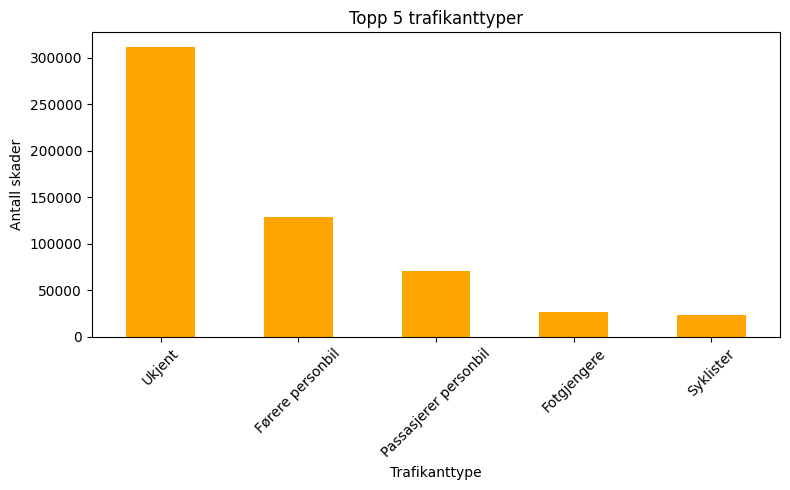

In [14]:

top = df.groupby("Trafikanttype")["Sum"].sum().sort_values(ascending=False).head(5)
top.plot(kind="bar", color="orange", figsize=(8,5))
plt.title("Topp 5 trafikanttyper")
plt.ylabel("Antall skader")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🏆 Analyse 7: Topp 5 trafikanttyper med høyest samlet skade

**Observasjon:**
- "Ukjent" kategori har flest skader.
- Førere og passasjerer i personbil står for de fleste kjente skadetilfellene.
- Fotgjengere og syklister følger deretter.

**Tolkning:**
- Hoveddelen av trafikkulykker skjer i privatbilsegmentet.
- Andelen med ukjent trafikanttype bør undersøkes nærmere – kan skyldes registreringspraksis.


## ✅ Konklusjon

- **Menn er overrepresentert** i nesten alle skade- og dødsstatistikker, trolig grunnet høyere eksponering og risikopreget kjøring.
- **Biltrafikk** står for klart flest ulykker, både som fører og passasjer.
- **Lettere skader dominerer** ulykkesstatistikken, mens andelen drepte er lav – men ikke ubetydelig.
- **Langsiktig trend** viser at drepte i trafikken har gått betydelig ned, særlig blant menn.
- **Datakvalitet** er et forbedringsområde, særlig for kategorien "Ukjent" både når det gjelder kjønn og trafikanttype.
- **Sikkerhetstiltak og holdningsendringer** bør i større grad målrettes mot menn og høyrisiko trafikantgrupper for videre nedgang.